In [1]:
import theano
import theano.tensor as T
import numpy as np

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
x = T.dvector('x')
y_tanh = T.tanh(x)
y_sigmoid = T.nnet.sigmoid(x)

In [4]:
J_sigmoid, updates = theano.scan(lambda i, y, x : T.grad(y[i], x), 
                                 sequences=T.arange(y_sigmoid.shape[0]), 
                                 non_sequences=[y_sigmoid, x])
f_sigmoid = theano.function([x], [y_sigmoid, T.sum(J_sigmoid,axis=1)], updates=updates)

In [5]:
J_tanh, updates = theano.scan(lambda i, y, x : T.grad(y[i], x), 
                                 sequences=T.arange(y_tanh.shape[0]), 
                                 non_sequences=[y_tanh, x])
f_tanh = theano.function([x], [y_tanh, T.sum(J_tanh,axis=1)], updates=updates)

In [6]:
x_data = np.arange(-10, 10, 0.01)
y_sigmoid_data, y_sigmoid_differential_data = f_sigmoid(x_data)
y_tanh_data, y_tanh_differential_data = f_tanh(x_data)

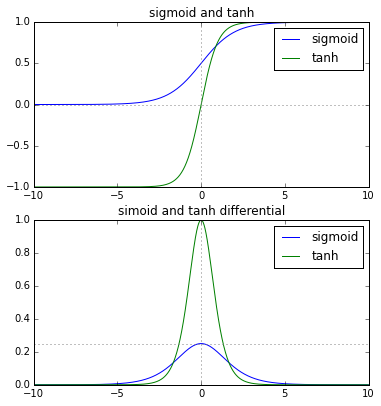

In [15]:
plt.figure(figsize=(6, 6.5))
ax = plt.subplot(2,1,1)
plt.plot(x_data, y_sigmoid_data, label='sigmoid')
plt.plot(x_data, y_tanh_data, label='tanh')
plt.axhline(y=0,ls=":",c="grey")#添加水平直线
plt.axvline(x=0,ls=":",c="grey")#添加垂直直线
ax.set_title('sigmoid and tanh')
ax.legend()

ax = plt.subplot(2,1,2)
plt.plot(x_data, y_sigmoid_differential_data, label='sigmoid')
plt.plot(x_data, y_tanh_differential_data, label='tanh')
ax.set_title('simoid and tanh differential')
plt.axhline(y=0.25,ls=":",c="grey")#添加水平直线
plt.axvline(x=0,ls=":",c="grey")#添加垂直直线
ax.legend()
plt.show()
